# COMP 6321 Machine Learning Project

In [124]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.tree        # For DecisionTreeClassifier class
import sklearn.ensemble    # For RandomForestClassifier class
import sklearn.metrics     # For accuracy_score
import pandas as pd
import glob
import time
import datetime

In [2]:
# Random Forest simple training and evaluation code
def randomForestSimple (X_train, y_train, X_test, y_test):
    rfc=sklearn.ensemble.RandomForestClassifier(random_state=0)
    rfc.fit(X_train, y_train)
    z_train=rfc.predict(X_train)
    z_test=rfc.predict(X_test)
    sklearn.metrics.plot_roc_curve(rfc, X_test, y_test)
    return sklearn.metrics.accuracy_score(y_train, z_train)*100, sklearn.metrics.accuracy_score(y_test, z_test)*100

In [3]:
# Random Forest training and evaluation code
def randomForestsTrainEval (X_train, y_train):
    start = time.time()
    depth=np.arange(1,10,2)
    estimators=2**np.arange(0,11,2)
    rfc=sklearn.ensemble.RandomForestClassifier(random_state=0)
    param_grid = { 'n_estimators': estimators, 'max_depth': depth}
    gs=sklearn.model_selection.GridSearchCV(rfc, param_grid, verbose=0, cv=3)
    gs.fit(X_train, y_train)
    t = time.time()-start
    return gs.best_estimator_, t

In [108]:
# Model plotting code
def plotModel (m, t, X_train, y_train, X_test, y_test):
    z_train=m.predict(X_train)
    z_test=m.predict(X_test)
    print (m)
    ac_train=sklearn.metrics.accuracy_score(y_train, z_train)*100
    ac_test=sklearn.metrics.accuracy_score(y_test, z_test)*100
    print ("Elapsed time:            "+"{:.4f}".format(t)+" sec")
    print ("Training accuracy score: "+"{:.4f}".format(ac_train)+"%")
    print ("Test accuracy score:     "+"{:.4f}".format(ac_test)+"%")
    if np.unique(y_train).size>2:
        lb = sklearn.preprocessing.LabelBinarizer()
        yy_test=lb.fit_transform(y_test)
        zz_test=lb.transform(z_test)
        roc=sklearn.metrics.roc_auc_score(yy_test, m.predict_proba(X_test), multi_class="ovr", average="weighted")*100
        print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")
    else:
        roc=sklearn.metrics.roc_auc_score(y_test, m.predict_proba(X_test)[:, 1])*100
        print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")
        sklearn.metrics.plot_roc_curve(m, X_test, y_test)
    return ac_train, ac_test, roc

In [5]:
# Ada Boost simple training and evaluation code
def adaBoostSimple (X_train, y_train, X_test, y_test):
    abc=sklearn.ensemble.AdaBoostClassifier(random_state=0,algorithm='SAMME.R')
    abc.fit(X_train, y_train)
    z_train=abc.predict(X_train)
    z_test=abc.predict(X_test)
    sklearn.metrics.plot_roc_curve(abc, X_test, y_test)
    return sklearn.metrics.accuracy_score(y_train, z_train)*100, sklearn.metrics.accuracy_score(y_test, z_test)*100

In [6]:
# Ada Boost training and evaluation code
def adaBoostTrainEval (X_train, y_train):
    start = time.time()
    estimators=10*np.arange(1,11,2)
    abc=sklearn.ensemble.AdaBoostClassifier(random_state=0,algorithm='SAMME.R')
    param_grid = { 'n_estimators': estimators}
    gs=sklearn.model_selection.GridSearchCV(abc, param_grid, verbose=0, cv=3)
    gs.fit(X_train, y_train)
    t = time.time()-start
    return gs.best_estimator_, t

In [7]:
results=np.zeros((8, 9, 4))
datasets=np.array(['Occupancy', 'Bank Marketing', 'Activity Recognition', 'Bitcoin Ransomware', 
                      'Montreal Crime', 'Credit Card', 'Census Income', 'Yeast', 
                      'Magic Gamma Telescope'])
methods=np.array(['K-nearest neighbours', 'Support vector', 'Decision tree', 'Random forest',
                     'AdaBoost', 'Logistic regression', 'Gaussian naive Bayes', 'Neural network'])
stats=np.array(['Elapsed Time', 'Training Accuracy Score', 'Testing Accuracy score', 'ROC AUC score'])

# 1. Occupancy dataset

In [8]:
# Loading code
R=np.loadtxt('../../datasets/1_occupancy/occupancy_data/datatraining.txt', delimiter=',', skiprows=1, usecols = (2,3,4,5,6,7))
X_train=R[:, 0:5]
y_train=R[:, 5].astype(np.int32)
T=np.loadtxt('../../datasets/1_occupancy/occupancy_data/datatest.txt', delimiter=',', skiprows=1, usecols = (2,3,4,5,6,7))
X_test=T[:, 0:5]
y_test=T[:, 5].astype(np.int32)

In [9]:
# Training and evaluation code
m, t=randomForestsTrainEval (X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=256, random_state=0)
Elapsed time:            71.5160 sec
Training accuracy score: 98.9193%
Test accuracy score:     97.8236%
ROC AUC score:           98.1994%


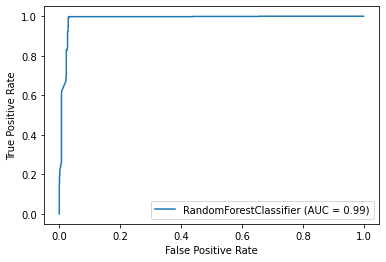

In [10]:
# Plotting code
results [3, 0, 0]=t
results [3, 0, 1], results [3, 0, 2], results [3, 0, 3] = plotModel (m, t, X_train, y_train, X_test, y_test)

In [11]:
# Training and evaluation code
m, t=adaBoostTrainEval (X_train, y_train)

AdaBoostClassifier(n_estimators=10, random_state=0)
Elapsed time:            3.1860 sec
Training accuracy score: 99.1895%
Test accuracy score:     96.5854%
ROC AUC score:           96.4800%


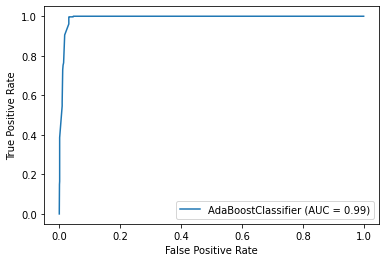

In [12]:
# Plotting code
results [4, 0, 0]=t
results [4, 0, 1], results [4, 0, 2], results [4, 0, 3] = plotModel (m, t, X_train, y_train, X_test, y_test)

# 2. Bank Marketing dataset

In [77]:
# Loading code
job_mapping = {'admin.':1, 'blue-collar':2, 'entrepreneur':3, 'housemaid':4, 'management':5, 'retired':6, 'self-employed':7, 'services':8, 'student':9, 'technician':10, 'unemployed':11, 'unknown':0}
boolean_mapping ={'no': 0, 'yes': 1}
marital_mapping ={'divorced':1, 'married':2, 'single':3}
education_mapping={'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 'high.school':4, 'illiterate':5, 'professional.course':6, 'university.degree':7}
contact_mapping={'cellular':1, 'telephone':2}
month_mapping={'may':5, 'jun':6, 'nov':11, 'sep':9, 'jul':7, 'aug':8, 'mar':3, 'oct':10, 'apr':4, 'dec':12}
day_mapping={'fri':5, 'wed':3, 'mon':1, 'thu':4, 'tue':2}
poutcome_mapping={'nonexistent':1, 'failure':2, 'success':3}
R=pd.read_csv('../../datasets/4_bank_additional/bank-additional/bank-additional/bank-additional.csv', delimiter=';').replace(boolean_mapping).replace(job_mapping).replace(marital_mapping).replace(education_mapping).replace(contact_mapping).replace(month_mapping).replace(day_mapping).replace(poutcome_mapping).values
X_train=R[:, [0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19]]
y_train=R[:, 20].astype(np.int32)
T=pd.read_csv('../../datasets/4_bank_additional/bank-additional/bank-additional/bank-additional-full.csv', delimiter=';').replace(boolean_mapping).replace(job_mapping).replace(marital_mapping).replace(education_mapping).replace(contact_mapping).replace(month_mapping).replace(day_mapping).replace(poutcome_mapping).values
X_test=T[:, [0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19]]
y_test=T[:, 20].astype(np.int32)

In [78]:
# Training and evaluation code
m, t=randomForestsTrainEval (X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=4, random_state=0)
Elapsed time:            47.3245 sec
Training accuracy score: 90.3860%
Test accuracy score:     89.7009%
ROC AUC score:           76.9093%


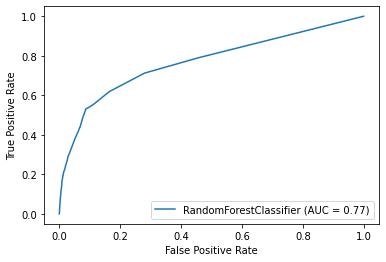

In [90]:
# Plotting code
results [3, 1, 0]=t
results [3, 1, 1], results [3, 1, 2], results [3, 1, 3] = plotModel (m, t, X_train, y_train, X_test, y_test)

In [94]:
# Training and evaluation code
m, t=adaBoostTrainEval (X_train, y_train)

AdaBoostClassifier(n_estimators=10, random_state=0)
Elapsed time:            2.5861 sec
Training accuracy score: 90.3375%
Test accuracy score:     89.8708%
ROC AUC score:           77.3692%


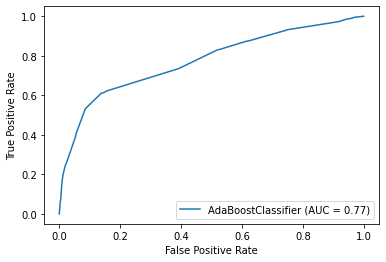

In [95]:
# Plotting code
results [4, 1, 0]=t
results [4, 1, 1], results [4, 1, 2], results [4, 1, 3] = plotModel (m, t, X_train, y_train, X_test, y_test)

# 3. Activity Recognition dataset

In [111]:
# Loading code
files = glob.glob("../../datasets/2_healthy_older_people/Datasets_Healthy_Older_People/datasets/S2_Dataset/d*")
Rs = [pd.read_csv(f, header=None) for f in files]
R=pd.concat(Rs,ignore_index=True).values
X_train=R[:, 1:8]
y_train=R[:, 8].astype(np.int32)
files = glob.glob("../../datasets/2_healthy_older_people/Datasets_Healthy_Older_People/datasets/S1_Dataset/d*")
Ts = [pd.read_csv(f, header=None) for f in files]
T=pd.concat(Ts,ignore_index=True).values
X_test=T[:, 1:8]
y_test=T[:, 8].astype(np.int32)

In [112]:
# Training and evaluation code
m, t=randomForestsTrainEval (X_train, y_train)

In [113]:
# Plotting code
results [3, 2, 0]=t
results [3, 2, 1], results [3, 2, 2], results [3, 2, 3] = plotModel (m, t, X_train, y_train, X_test, y_test)

RandomForestClassifier(max_depth=7, n_estimators=4, random_state=0)
Elapsed time:            137.6476 sec
Training accuracy score: 98.8961%
Test accuracy score:     50.3354%
ROC AUC score:           82.0695%


In [114]:
# Training and evaluation code
m, t=adaBoostTrainEval (X_train, y_train)

In [115]:
# Plotting code
results [4, 2, 0]=t
results [4, 2, 1], results [4, 2, 2], results [4, 2, 3] = plotModel (m, t, X_train, y_train, X_test, y_test)

AdaBoostClassifier(n_estimators=90, random_state=0)
Elapsed time:            8.7120 sec
Training accuracy score: 92.2282%
Test accuracy score:     32.6264%
ROC AUC score:           79.7409%


# 4. Bitcoin Ransomeware dataset

In [23]:
# Loading code
nrows=100000
nparts=10
ntest=nrows//nparts
label_mapping = {'princetonCerber':1, 'princetonLocky':1, 'montrealCryptoLocker':1,
 'montrealCryptXXX':1, 'paduaCryptoWall':1, 'montrealWannaCry':1,
 'montrealDMALockerv3':1, 'montrealCryptoTorLocker2015':1, 'montrealSamSam':1,
 'montrealFlyper':1, 'montrealNoobCrypt':1, 'montrealDMALocker':1, 'montrealGlobe':1,
 'montrealEDA2':1, 'paduaKeRanger':1, 'montrealVenusLocker':1, 'montrealXTPLocker':1,
 'paduaJigsaw':1, 'montrealGlobev3':1, 'montrealJigSaw':1, 'montrealXLockerv5.0':1,
 'montrealXLocker':1, 'montrealRazy':1, 'montrealCryptConsole':1,
 'montrealGlobeImposter':1, 'montrealSam':1, 'montrealComradeCircle':1,
 'montrealAPT':1, 'white':0}
R=pd.read_csv('../../datasets/3_bitcoin_heist_ransonware_address/data/BitcoinHeistData.csv', nrows=nrows, usecols=["year","day","length","weight","count","looped","neighbors","income","label"]).replace(label_mapping).values
np.random.seed(0)
np.random.shuffle(R)
X_train=R[:ntest, 0:8]
y_train=R[:ntest, 8].astype(np.int32)
X_test=R[ntest:, 0:8]
y_test=R[ntest:, 8].astype(np.int32)

In [24]:
# Training and evaluation code
m, t=randomForestsTrainEval (X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=256, random_state=0)
Elapsed time:            63.5272 sec
Training accuracy score: 100.0000%
Test accuracy score:     100.0000%
ROC AUC score:           100.0000%


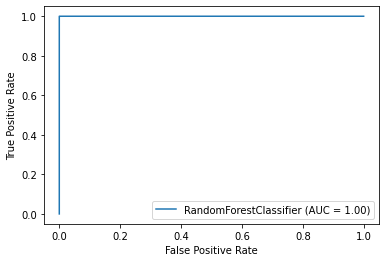

In [25]:
# Plotting code
results [3, 3, 0]=t
results [3, 3, 1], results [3, 3, 2], results [3, 3, 3] = plotModel (m, t, X_train, y_train, X_test, y_test)

In [26]:
# Training and evaluation code
m, t=adaBoostTrainEval (X_train, y_train)

AdaBoostClassifier(n_estimators=10, random_state=0)
Elapsed time:            3.9321 sec
Training accuracy score: 100.0000%
Test accuracy score:     100.0000%
ROC AUC score:           100.0000%


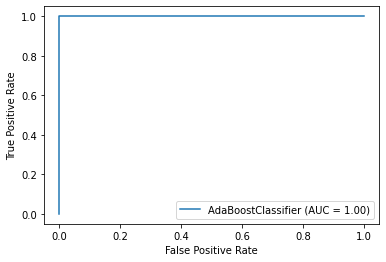

In [27]:
# Plotting code
results [4, 3, 0]=t
results [4, 3, 1], results [4, 3, 2], results [4, 3, 3] = plotModel (m, t, X_train, y_train, X_test, y_test)

# 5. Montreal Crime dataset

In [132]:
# Loading code
category_mapping = {'Introduction':1, 'Vol dans / sur véhicule à moteur':2, 'Vol de véhicule à moteur':3, 'Méfait':4, 'Vol qualifié':5, 'Infraction entraînant la mort':6, 'Vols qualifiés':5, 'Infractions entrainant la mort':6}
shift_mapping ={'jour':1, 'soir':2, 'nuit':3}
TR=pd.read_csv('../../datasets/5_interventionscitoyendo/interventionscitoyendo.csv', encoding='latin1').replace(category_mapping).replace(shift_mapping)
TR['YEAR']=TR.DATE.str.split('-').str[0].astype(np.int32)
TR['MONTH']=TR.DATE.str.split('-').str[1].astype(np.int32)
TR['DAY']=TR.DATE.str.split('-').str[2].astype(np.int32)
TR['DOW'] = pd.to_datetime(TR['DATE'] ,errors = 'coerce',format = '%Y-%m-%d').dt.dayofweek
TR.dropna(inplace=True)
R_train=TR.loc[TR['YEAR'] == 2018].values
X_train=R_train[:, [2,3,4,5,6,7,9,10,11]]
y_train=R_train[:, 0].astype(np.int32)
R_test=TR.loc[TR['YEAR'] == 2019].values
X_test=R_test[:, [2,3,4,5,6,7,9,10,11]]
y_test=R_test[:, 0].astype(np.int32)

In [133]:
# Training and evaluation code
m, t=randomForestsTrainEval (X_train, y_train)

In [134]:
# Plotting code
results [3, 4, 0]=t
results [3, 4, 1], results [3, 4, 2], results [3, 4, 3] = plotModel (m, t, X_train, y_train, X_test, y_test)

RandomForestClassifier(max_depth=9, n_estimators=256, random_state=0)
Elapsed time:            307.5568 sec
Training accuracy score: 46.8224%
Test accuracy score:     37.5879%
ROC AUC score:           65.0284%


In [135]:
# Training and evaluation code
m, t=adaBoostTrainEval (X_train, y_train)

In [136]:
# Plotting code
results [4, 4, 0]=t
results [4, 4, 1], results [4, 4, 2], results [4, 4, 3] = plotModel (m, t, X_train, y_train, X_test, y_test)

AdaBoostClassifier(n_estimators=90, random_state=0)
Elapsed time:            24.2615 sec
Training accuracy score: 35.9931%
Test accuracy score:     34.4025%
ROC AUC score:           54.7982%


# 6. Credit Card dataset

In [98]:
# Loading code
R=pd.read_csv('../../datasets/6_credit_cards/default_of_credit_card_clients.csv', skiprows=1, usecols=np.arange(1, 26, 1)).values

X = R[:, :23]
y = R[:, 23].astype(np.int32)
X = X[:5000]
y = y[:5000]

X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [99]:
# Training and evaluation code
m, t=randomForestsTrainEval (X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=1024, random_state=0)
Elapsed time:            71.2750 sec
Training accuracy score: 87.9500%
Test accuracy score:     81.0000%
ROC AUC score:           76.1062%


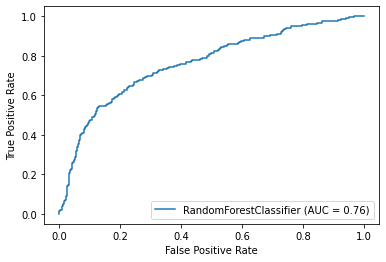

In [100]:
# Plotting code
results [3, 5, 0]=t
results [3, 5, 1], results [3, 5, 2], results [3, 5, 3] = plotModel (m, t, X_train, y_train, X_test, y_test)

In [101]:
# Training and evaluation code
m, t=adaBoostTrainEval (X_train, y_train)

AdaBoostClassifier(random_state=0)
Elapsed time:            9.1500 sec
Training accuracy score: 80.3500%
Test accuracy score:     80.8000%
ROC AUC score:           74.6242%


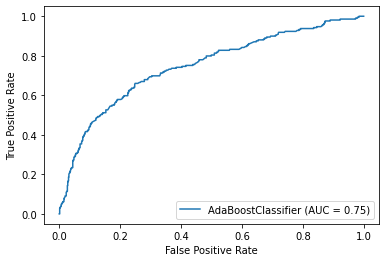

In [102]:
# Plotting code
results [4, 5, 0]=t
results [4, 5, 1], results [4, 5, 2], results [4, 5, 3] = plotModel (m, t, X_train, y_train, X_test, y_test)

# 7. Census Income Dataset

In [103]:
# Loading code
TR=pd.read_csv('../../datasets/7_census_income/adult_data.csv', encoding='utf8', header=None)
TR = TR.apply(lambda x: x.apply(lambda y: y.strip() if type(y) == type('') else y), axis=0)

workclass_mapping = {'Private':1, 'Self-emp-not-inc':2
                    , 'Self-emp-inc':3, 'Federal-gov':4
                    , 'Local-gov':5, 'State-gov':6
                    , 'Without-pay':7, 'Never-worked':8}
TR = TR.replace(workclass_mapping)


education_mapping = {'Bachelors':1, 'Some-college':2, '11th':3
                     , 'HS-grad':4, 'Prof-school':5, 'Assoc-acdm':6
                     , 'Assoc-voc':7, '9th':8, '7th-8th':9
                     , '12th':10, 'Masters':11, '1st-4th':12
                     , '10th':13, 'Doctorate':14, '5th-6th':15
                     , 'Preschool':16}
TR = TR.replace(education_mapping)

marital_status_mapping = {'Married-civ-spouse':1, 'Divorced':2, 'Never-married':3
                          , 'Separated':4, 'Widowed':5, 'Married-spouse-absent':6
                          , 'Married-AF-spouse':7}
TR = TR.replace(marital_status_mapping)

occupation_mapping = {'Tech-support':1, 'Craft-repair':2, 'Other-service':3
                      , 'Sales':4, 'Exec-managerial':5, 'Prof-specialty':6
                      , 'Handlers-cleaners':7, 'Machine-op-inspct':8, 'Adm-clerical':9
                      , 'Farming-fishing':10, 'Transport-moving':11, 'Priv-house-serv':12
                      , 'Protective-serv':13, 'Armed-Forces':14}
TR = TR.replace(occupation_mapping)

relationship_mapping = {'Wife':1, 'Own-child':2, 'Husband':3
                , 'Not-in-family':4, 'Other-relative':5, 'Unmarried':6}
TR = TR.replace(relationship_mapping)

race_mapping = {'White':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3
                , 'Other':4, 'Black':5}
TR = TR.replace(race_mapping)

sex_mapping = {'Female':1, 'Male':2}
TR = TR.replace(sex_mapping)

country_mapping = {'United-States':1, 'Cambodia':2, 'England':3
                   , 'Puerto-Rico':4, 'Canada':5, 'Germany':6
                   , 'Outlying-US(Guam-USVI-etc)':7, 'India':8
                   , 'Japan':9, 'Greece':10, 'South':11
                   , 'China':12, 'Cuba':13, 'Iran':14
                   , 'Honduras':15, 'Philippines':16, 'Italy':17
                   , 'Poland':18, 'Jamaica':19, 'Vietnam':20
                   , 'Mexico':21, 'Portugal':22, 'Ireland':23
                   , 'France':24, 'Dominican-Republic':25, 'Laos':26
                   , 'Ecuador':27, 'Taiwan':28, 'Haiti':29
                   , 'Columbia':30, 'Hungary':31, 'Guatemala':32
                   , 'Nicaragua':33, 'Scotland':34, 'Thailand':35
                   , 'Yugoslavia':36, 'El-Salvador':37, 'Trinadad&Tobago':38
                   , 'Peru':39, 'Hong':40, 'Holand-Netherlands':41}
TR = TR.replace(country_mapping)

salary_mapping = {'<=50K':0, '>50K':1}
TR = TR.replace(salary_mapping)

TR = TR.replace(to_replace='?', value=np.nan)
TR.dropna(inplace=True)

R=TR.values
shape = R.shape
X = R[:, :shape[1]-1].astype(np.float32)
y = R[:, shape[1]-1].astype(np.int32)

X = X[:5000]
y = y[:5000]

X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [104]:
# Training and evaluation code
m, t=randomForestsTrainEval (X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=64, random_state=0)
Elapsed time:            44.7661 sec
Training accuracy score: 86.4250%
Test accuracy score:     84.8000%
ROC AUC score:           90.3944%


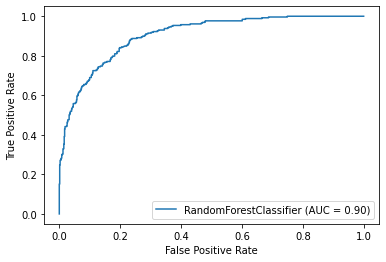

In [105]:
# Plotting code
results [3, 6, 0]=t
results [3, 6, 1], results [3, 6, 2], results [3, 6, 3] = plotModel (m, t, X_train, y_train, X_test, y_test)

In [106]:
# Training and evaluation code
m, t=adaBoostTrainEval (X_train, y_train)

AdaBoostClassifier(n_estimators=90, random_state=0)
Elapsed time:            2.7310 sec
Training accuracy score: 86.4500%
Test accuracy score:     85.9000%
ROC AUC score:           90.7160%


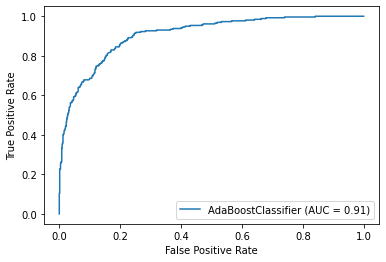

In [107]:
# Plotting code
results [4, 6, 0]=t
results [4, 6, 1], results [4, 6, 2], results [4, 6, 3] = plotModel (m, t, X_train, y_train, X_test, y_test)

# 8. Yeast Dataset

In [43]:
# Loading code
TR=pd.read_csv('../../datasets/8_yeast/yeast_dataset.csv', encoding='utf8', header=None, usecols = np.arange(1, 10, 1))
TR = TR.apply(lambda x: x.apply(lambda y: y.strip() if type(y) == type('') else y), axis=0)

localization_site_mapping = {'MIT':1, 'NUC':2, 'CYT':3
                     , 'ME1':4, 'EXC':5, 'ME2':6
                     , 'ME3':7, 'VAC':8, 'POX':9
                     , 'ERL':10}
TR = TR.replace(localization_site_mapping)

TR = TR.replace(to_replace='?', value=np.nan)
TR.dropna(inplace=True)

R=TR.values
shape = R.shape
X = R[:, :shape[1]-1].astype(np.float32)
y = R[:, shape[1]-1].astype(np.int32)

X = X[:5000]
y = y[:5000]

X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
# Training and evaluation code
m, t=randomForestsTrainEval (X_train, y_train)

In [45]:
# Plotting code
results [3, 7, 0]=t
results [3, 7, 1], results [3, 7, 2], results [3, 7, 3] = plotModel (m, t, X_train, y_train, X_test, y_test)

RandomForestClassifier(max_depth=9, n_estimators=1024, random_state=0)
Elapsed time:            33.1660 sec
Training accuracy score: 79.7810%
Test accuracy score:     63.6364%
ROC AUC score:           75.2331%


In [46]:
# Training and evaluation code
m, t=adaBoostTrainEval (X_train, y_train)

In [47]:
# Plotting code
results [4, 7, 0]=t
results [4, 7, 1], results [4, 7, 2], results [4, 7, 3] = plotModel (m, t, X_train, y_train, X_test, y_test)

AdaBoostClassifier(n_estimators=10, random_state=0)
Elapsed time:            1.4720 sec
Training accuracy score: 43.6394%
Test accuracy score:     42.7609%
ROC AUC score:           59.4320%


# 9. Magic Gamma Telescope

In [48]:
# Loading code
mapping = {'h':0, 'g':1}

data_magic = pd.read_csv('../../datasets/9_magic_gamma/MagicGamma.txt',delimiter=',',names=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fm3Long','fm3Trans','fAlpha','fDist','class']).replace(mapping)
X=data_magic.iloc[:,:-1]
y=data_magic.iloc[:,-1]
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)

In [49]:
# Training and evaluation code
m, t=randomForestsTrainEval (X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=1024, random_state=0)
Elapsed time:            268.9430 sec
Training accuracy score: 89.4716%
Test accuracy score:     86.9611%
ROC AUC score:           83.5769%


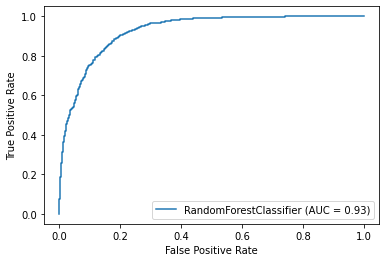

In [50]:
# Plotting code
results [3, 8, 0]=t
results [3, 8, 1], results [3, 8, 2], results [3, 8, 3] = plotModel (m, t, X_train, y_train, X_test, y_test)

In [51]:
# Training and evaluation code
m, t=adaBoostTrainEval (X_train, y_train)

AdaBoostClassifier(n_estimators=90, random_state=0)
Elapsed time:            12.8650 sec
Training accuracy score: 85.3707%
Test accuracy score:     84.9106%
ROC AUC score:           82.2065%


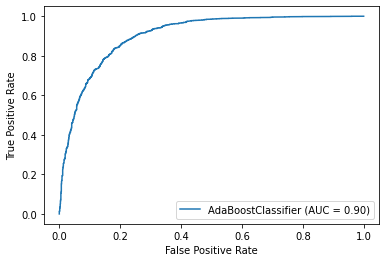

In [52]:
# Plotting code
results [4, 8, 0]=t
results [4, 8, 1], results [4, 8, 2], results [4, 8, 3] = plotModel (m, t, X_train, y_train, X_test, y_test)

# Reporting

In [121]:
for i in range(4):
    print (stats[i])
    print ("                       ", end='')
    for j in range (3,5):
        print (methods[j]+"  ", end='')
    print (" ")
    for k in range(9):
        print ('{:22s}'.format(datasets[k])+" ", end='')
        for j in range (3,5):
            print ("{:8.4f}".format(results[j, k, i])+'       ', end='')
        print (" ")
    print (" ")

Elapsed Time
                       Random forest  AdaBoost   
Occupancy               71.5160         3.1860        
Bank Marketing          47.3245         2.5861        
Activity Recognition   137.6476         8.7120        
Bitcoin Ransomware      63.5272         3.9321        
Montreal Crime         306.6418        22.3630        
Credit Card             71.2750         9.1500        
Census Income           44.7661         2.7310        
Yeast                   33.1660         1.4720        
Magic Gamma Telescope  268.9430        12.8650        
 
Training Accuracy Score
                       Random forest  AdaBoost   
Occupancy               98.9193        99.1895        
Bank Marketing          90.3860        90.3375        
Activity Recognition    98.8961        92.2282        
Bitcoin Ransomware     100.0000       100.0000        
Montreal Crime          46.2164        36.7012        
Credit Card             87.9500        80.3500        
Census Income           86.4250     